In [2]:
import pandas as pd 
import numpy as np 

### 處理AUD

In [166]:
# 匯入數據資料
aud_df = pd.read_csv('./FXCM_Data/AUDUSD.csv')

In [167]:
# 針對時間做排序(剛好是倒過來的)
aud_df = aud_df.iloc[::-1]

In [168]:
# 重新排列index
aud_df = aud_df.reset_index(drop=True)

In [169]:
# 選取需要使用的欄位
aud_df = aud_df[['Time','AUD/USD(open,bid)','AUD/USD(close,bid)']]

In [170]:
# 檢視
aud_df

,Time,"AUD/USD(open,bid)","AUD/USD(close,bid)"
0,05/11/1993 17:00:00,0.70652,0.70402
1,05/12/1993 17:00:00,0.70402,0.70272
2,05/13/1993 17:00:00,0.70272,0.70202
3,05/14/1993 17:00:00,0.70202,0.70552
4,05/18/1993 17:00:00,0.70352,0.70402
...,...,...,...
7003,01/05/2022 17:00:00,0.72379,0.72200
7004,01/06/2022 17:00:00,0.72200,0.71593
7005,01/07/2022 17:00:00,0.71593,0.71801
7006,01/10/2022 17:00:00,0.71801,0.71662


In [171]:
aud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                7008 non-null   object 
 1   AUD/USD(open,bid)   7008 non-null   float64
 2   AUD/USD(close,bid)  7008 non-null   float64
dtypes: float64(2), object(1)
memory usage: 164.4+ KB


In [172]:
# 裁切時間欄位，以方便後續處理
aud_df[['month','day','aa']] = aud_df.Time.str.split('/', expand=True)

In [173]:
aud_df[['year','time']] = aud_df.aa.str.split(' ', expand=True)

In [174]:
aud_df

,Time,"AUD/USD(open,bid)","AUD/USD(close,bid)",month,day,aa,year,time
0,05/11/1993 17:00:00,0.70652,0.70402,05,11,1993 17:00:00,1993,17:00:00
1,05/12/1993 17:00:00,0.70402,0.70272,05,12,1993 17:00:00,1993,17:00:00
2,05/13/1993 17:00:00,0.70272,0.70202,05,13,1993 17:00:00,1993,17:00:00
3,05/14/1993 17:00:00,0.70202,0.70552,05,14,1993 17:00:00,1993,17:00:00
4,05/18/1993 17:00:00,0.70352,0.70402,05,18,1993 17:00:00,1993,17:00:00
...,...,...,...,...,...,...,...,...
7003,01/05/2022 17:00:00,0.72379,0.72200,01,05,2022 17:00:00,2022,17:00:00
7004,01/06/2022 17:00:00,0.72200,0.71593,01,06,2022 17:00:00,2022,17:00:00
7005,01/07/2022 17:00:00,0.71593,0.71801,01,07,2022 17:00:00,2022,17:00:00
7006,01/10/2022 17:00:00,0.71801,0.71662,01,10,2022 17:00:00,2022,17:00:00


In [175]:
aud_df['date'] = aud_df[['year','month','day']].apply('-'.join, axis=1)

In [176]:
aud_df

,Time,"AUD/USD(open,bid)","AUD/USD(close,bid)",month,day,aa,year,time,date
0,05/11/1993 17:00:00,0.70652,0.70402,05,11,1993 17:00:00,1993,17:00:00,1993-05-11
1,05/12/1993 17:00:00,0.70402,0.70272,05,12,1993 17:00:00,1993,17:00:00,1993-05-12
2,05/13/1993 17:00:00,0.70272,0.70202,05,13,1993 17:00:00,1993,17:00:00,1993-05-13
3,05/14/1993 17:00:00,0.70202,0.70552,05,14,1993 17:00:00,1993,17:00:00,1993-05-14
4,05/18/1993 17:00:00,0.70352,0.70402,05,18,1993 17:00:00,1993,17:00:00,1993-05-18
...,...,...,...,...,...,...,...,...,...
7003,01/05/2022 17:00:00,0.72379,0.72200,01,05,2022 17:00:00,2022,17:00:00,2022-01-05
7004,01/06/2022 17:00:00,0.72200,0.71593,01,06,2022 17:00:00,2022,17:00:00,2022-01-06
7005,01/07/2022 17:00:00,0.71593,0.71801,01,07,2022 17:00:00,2022,17:00:00,2022-01-07
7006,01/10/2022 17:00:00,0.71801,0.71662,01,10,2022 17:00:00,2022,17:00:00,2022-01-10


In [177]:
aud_df = aud_df[['date', 'AUD/USD(open,bid)','AUD/USD(close,bid)']]

In [178]:
aud_df

,date,"AUD/USD(open,bid)","AUD/USD(close,bid)"
0,1993-05-11,0.70652,0.70402
1,1993-05-12,0.70402,0.70272
2,1993-05-13,0.70272,0.70202
3,1993-05-14,0.70202,0.70552
4,1993-05-18,0.70352,0.70402
...,...,...,...
7003,2022-01-05,0.72379,0.72200
7004,2022-01-06,0.72200,0.71593
7005,2022-01-07,0.71593,0.71801
7006,2022-01-10,0.71801,0.71662


In [179]:
# 目前資料比較合理了
# 區出我們需要的時間段來用
print(aud_df.loc[aud_df['date'] == '2015-12-31'])
print(aud_df.loc[aud_df['date'] == '2020-12-31'])

            date  AUD/USD(open,bid)  AUD/USD(close,bid)
5444  2015-12-31            0.72848             0.72849
            date  AUD/USD(open,bid)  AUD/USD(close,bid)
6740  2020-12-31            0.76835             0.76994


In [180]:
aud_df = aud_df.loc[5444:6740]

In [181]:
aud_df = aud_df.reset_index(drop=True)

In [182]:
aud_df

,date,"AUD/USD(open,bid)","AUD/USD(close,bid)"
0,2015-12-31,0.72848,0.72849
1,2016-01-04,0.72813,0.71885
2,2016-01-05,0.71885,0.71586
3,2016-01-06,0.71586,0.70703
4,2016-01-07,0.70703,0.70105
...,...,...,...
1292,2020-12-24,0.75726,0.75929
1293,2020-12-28,0.75988,0.75759
1294,2020-12-29,0.75759,0.76012
1295,2020-12-30,0.76012,0.76835


In [183]:
growth_value = list()
growth_rate = list()

for i in range(aud_df.shape[0]-1):
    growth_value.append(aud_df['AUD/USD(close,bid)'][i+1] - aud_df['AUD/USD(close,bid)'][i])
    
for i in range(aud_df.shape[0]-1):
    growth_rate.append(((aud_df['AUD/USD(close,bid)'][i+1]-aud_df['AUD/USD(close,bid)'][i]) / aud_df['AUD/USD(close,bid)'][i])*100)

In [184]:
# 取完需要的數據，我們計算當日漲跌，以及漲跌幅度
aud_df = aud_df.loc[1:1297]
aud_df = aud_df.reset_index(drop=True)
aud_df['growth value'] = growth_value
aud_df['growth rate'] = growth_rate

In [185]:
aud_df

,date,"AUD/USD(open,bid)","AUD/USD(close,bid)",growth value,growth rate
0,2016-01-04,0.72813,0.71885,-0.00964,-1.323285
1,2016-01-05,0.71885,0.71586,-0.00299,-0.415942
2,2016-01-06,0.71586,0.70703,-0.00883,-1.233481
3,2016-01-07,0.70703,0.70105,-0.00598,-0.845792
4,2016-01-08,0.70105,0.69467,-0.00638,-0.910063
...,...,...,...,...,...
1291,2020-12-24,0.75726,0.75929,0.00203,0.268072
1292,2020-12-28,0.75988,0.75759,-0.00170,-0.223893
1293,2020-12-29,0.75759,0.76012,0.00253,0.333954
1294,2020-12-30,0.76012,0.76835,0.00823,1.082724


In [186]:
print(aud_df.describe())

       AUD/USD(open,bid)  AUD/USD(close,bid)  growth value  growth rate
count        1296.000000         1296.000000   1296.000000  1296.000000
mean            0.728643            0.728721      0.000032     0.006093
std             0.040223            0.040215      0.004328     0.603494
min             0.574180            0.574180     -0.024840    -3.831619
25%             0.701357            0.701480     -0.002490    -0.348267
50%             0.731225            0.731380      0.000190     0.025605
75%             0.759107            0.759435      0.002592     0.355995
max             0.809960            0.810780      0.015160     2.242214


In [187]:
aud_growth_rate_mean = aud_df["growth rate"].mean()
aud_growth_rate_std = aud_df["growth rate"].std()

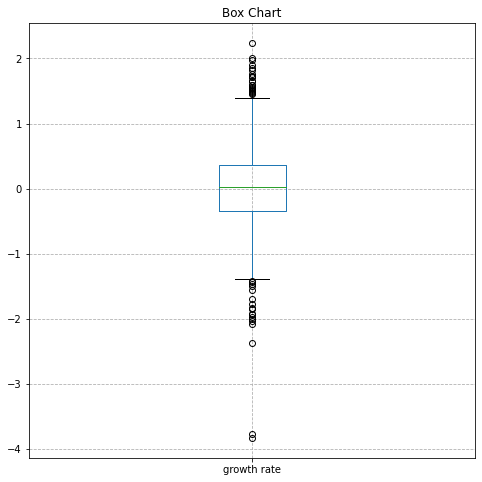

In [188]:
import matplotlib.pyplot as plt

# 利用盒形圖判斷資料分布的樣子，可以各自知道outliner跟四分位數
plt.figure(figsize=(8,8))
aud_df['growth rate'].plot.box(title="Box Chart")
plt.grid(linestyle="--", alpha=1)
plt.show()

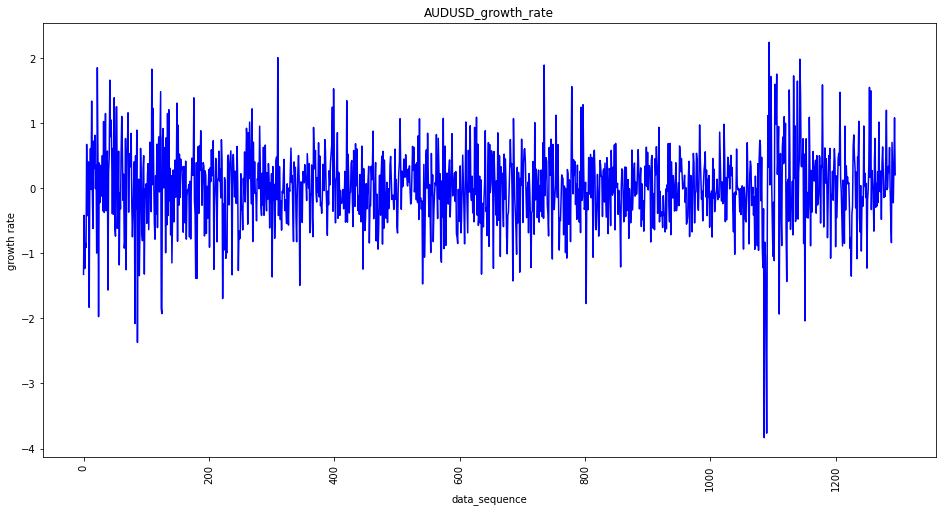

In [189]:
plt.figure(figsize=(16,8))
plt.plot(aud_df["growth rate"], color='b')
plt.xlabel('data_sequence') # 設定x軸標題
plt.ylabel('growth rate')
plt.xticks(rotation='vertical') # 設定x軸label以及垂直顯示
plt.title('AUDUSD_growth_rate') # 設定圖表標題
plt.show()

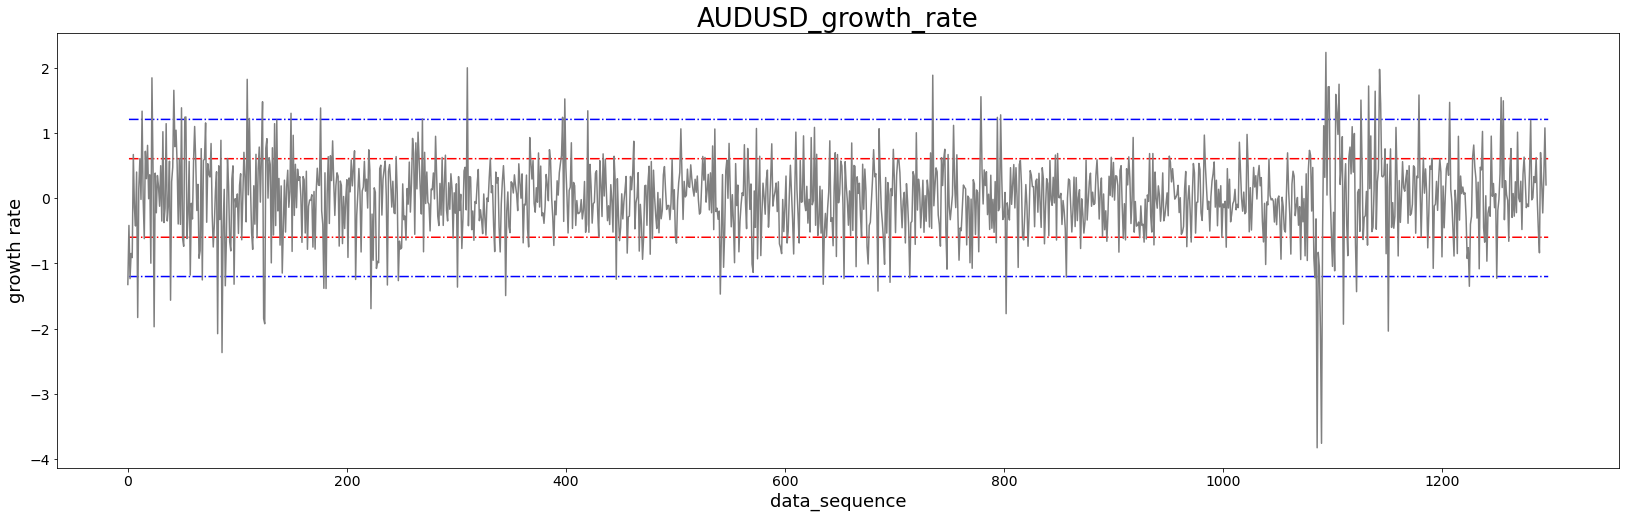

In [191]:
#建立一標準差的上下線(68%)
z = list()
base_up = list()
base_blow = list()
base_2up = list()
base_2blow = list()

for i in range(1297):
    z.append(i+1)
    base_up.append(aud_growth_rate_mean+aud_growth_rate_std)
    base_blow.append(aud_growth_rate_mean-aud_growth_rate_std)
    base_2up.append(aud_growth_rate_mean+aud_growth_rate_std*2)
    base_2blow.append(aud_growth_rate_mean-aud_growth_rate_std*2)

plt.figure(figsize=(28,8))

#畫第一條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_up, "r-.")  

#畫第二條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_blow, "r-.")  

#畫第三條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_2up, "b-.")  

#畫第四條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_2blow, "b-.")  

plt.plot(aud_df["growth rate"], color='gray')
plt.xlabel('data_sequence', fontsize = 18) # 設定x軸標題
plt.ylabel('growth rate', fontsize = 18)
plt.xticks(fontsize = 14) # 設定x軸label以及垂直顯示
plt.yticks(fontsize = 14) # 設定y軸label以及垂直顯示
plt.title('AUDUSD_growth_rate', fontsize = 26) # 設定圖表標題
plt.show() 

In [192]:
#covid-19
aud_df[aud_df["growth rate"] == aud_df["growth rate"].min()]

,date,"AUD/USD(open,bid)","AUD/USD(close,bid)",growth value,growth rate
1086,2020-03-12,0.64829,0.62345,-0.02484,-3.831619


In [193]:
# 0->跌
# 1->漲
# 2->平盤

binary = list()

for i in range(aud_df.shape[0]):
    if aud_df['growth value'][i] < 0:
        binary.append(0)
    
    elif aud_df['growth value'][i] > 0:
        binary.append(1)
    
    elif aud_df['growth value'][i] == 0:
        binary.append(2)
        
aud_df["binary"] = binary

In [194]:
#取百分之一的區間
ternary = list()

for i in range(aud_df.shape[0]):
    if aud_df['growth rate'][i] < -0.1:
        ternary.append(0)
    
    elif aud_df['growth rate'][i] > 0.1:
        ternary.append(1)
        
    else :
        ternary.append(2)
        
aud_df["ternary_1"] = ternary

#取百分之二的區間
ternary = list()

for i in range(aud_df.shape[0]):
    if aud_df['growth rate'][i] < -0.2:
        ternary.append(0)
    
    elif aud_df['growth rate'][i] > 0.2:
        ternary.append(1)
        
    else :
        ternary.append(2)
        
aud_df["ternary_2"] = ternary

In [195]:
aud_df

,date,"AUD/USD(open,bid)","AUD/USD(close,bid)",growth value,growth rate,binary,ternary_1,ternary_2
0,2016-01-04,0.72813,0.71885,-0.00964,-1.323285,0,0,0
1,2016-01-05,0.71885,0.71586,-0.00299,-0.415942,0,0,0
2,2016-01-06,0.71586,0.70703,-0.00883,-1.233481,0,0,0
3,2016-01-07,0.70703,0.70105,-0.00598,-0.845792,0,0,0
4,2016-01-08,0.70105,0.69467,-0.00638,-0.910063,0,0,0
...,...,...,...,...,...,...,...,...
1291,2020-12-24,0.75726,0.75929,0.00203,0.268072,1,1,1
1292,2020-12-28,0.75988,0.75759,-0.00170,-0.223893,0,0,0
1293,2020-12-29,0.75759,0.76012,0.00253,0.333954,1,1,1
1294,2020-12-30,0.76012,0.76835,0.00823,1.082724,1,1,1


In [196]:
up = 0
down = 0
b = 0

for i in aud_df["binary"]:
    if i == 0:
        down += 1
    elif i == 1:
        up += 1
    elif i == 2:
        b += 1

print("上漲: ",up)
print("下跌: ",down)
print("平盤: ",b) 

上漲:  675
下跌:  621
平盤:  0


In [197]:
up = 0
down = 0
b = 0

for i in aud_df["ternary_1"]:
    if i == 0:
        down += 1
    elif i == 1:
        up += 1
    elif i == 2:
        b += 1

print("上漲: ",up)
print("下跌: ",down)
print("平盤: ",b) 

上漲:  574
下跌:  517
平盤:  205


In [198]:
up = 0
down = 0
b = 0

for i in aud_df["ternary_2"]:
    if i == 0:
        down += 1
    elif i == 1:
        up += 1
    elif i == 2:
        b += 1

print("上漲: ",up)
print("下跌: ",down)
print("平盤: ",b) 

上漲:  477
下跌:  431
平盤:  388


In [103]:
aud_df

,date,"AUD/USD(open,bid)","AUD/USD(close,bid)",growth value,growth rate,binary,ternary_1,ternary_2
0,2016-01-04,0.72813,0.71885,-0.00964,-1.323285,0,0,0
1,2016-01-05,0.71885,0.71586,-0.00299,-0.415942,0,0,0
2,2016-01-06,0.71586,0.70703,-0.00883,-1.233481,0,0,0
3,2016-01-07,0.70703,0.70105,-0.00598,-0.845792,0,0,0
4,2016-01-08,0.70105,0.69467,-0.00638,-0.910063,0,0,0
...,...,...,...,...,...,...,...,...
1397,2021-05-25,0.77507,0.77479,-0.00028,-0.036126,0,2,2
1398,2021-05-26,0.77479,0.77398,-0.00081,-0.104544,0,0,2
1399,2021-05-27,0.77398,0.77427,0.00029,0.037469,1,2,2
1400,2021-05-28,0.77427,0.77078,-0.00349,-0.450747,0,0,0


In [231]:
aud_df.to_csv("./Pre_data/forex/AUDUSD_rate_105_109.csv")

### 處理EUR

In [4]:
# 匯入數據資料
eur_df = pd.read_csv('./FXCM_Data/EURUSD.csv')

In [5]:
# 針對時間做排序(剛好是倒過來的)
eur_df = eur_df.iloc[::-1]

# 重新排列index
eur_df = eur_df.reset_index(drop=True)

# 選取需要使用的欄位
eur_df = eur_df[['Time','EUR/USD(open,bid)','EUR/USD(close,bid)']]

# 裁切時間欄位，以方便後續處理
eur_df[['month','day','aa']] = eur_df.Time.str.split('/', expand=True)
eur_df[['year','time']] = eur_df.aa.str.split(' ', expand=True)
eur_df['date'] = eur_df[['year','month','day']].apply('-'.join, axis=1)
eur_df = eur_df[['date', 'EUR/USD(open,bid)','EUR/USD(close,bid)']]

print(eur_df)

            date  EUR/USD(open,bid)  EUR/USD(close,bid)
0     1993-05-10            1.24124             1.23764
1     1993-05-11            1.23764             1.23534
2     1993-05-12            1.23534             1.22254
3     1993-05-13            1.22254             1.23454
4     1993-05-14            1.23454             1.22644
...          ...                ...                 ...
7407  2022-01-05            1.12860             1.13115
7408  2022-01-06            1.13115             1.12943
7409  2022-01-07            1.12943             1.13603
7410  2022-01-10            1.13512             1.13243
7411  2022-01-11            1.13243             1.13311

[7412 rows x 3 columns]


In [6]:
# 目前資料比較合理了
# 區出我們需要的時間段來用
print(eur_df.loc[eur_df['date'] == '2015-12-31'])
print(eur_df.loc[eur_df['date'] == '2020-12-31'])

            date  EUR/USD(open,bid)  EUR/USD(close,bid)
5848  2015-12-31            1.09306             1.08625
            date  EUR/USD(open,bid)  EUR/USD(close,bid)
7144  2020-12-31            1.22921             1.22151


In [7]:
eur_df = eur_df.loc[5848:7144]
eur_df = eur_df.reset_index(drop=True)

growth_value = list()
growth_rate = list()

for i in range(eur_df.shape[0]-1):
    growth_value.append(eur_df['EUR/USD(close,bid)'][i+1] - eur_df['EUR/USD(close,bid)'][i])
    
for i in range(eur_df.shape[0]-1):
    growth_rate.append(((eur_df['EUR/USD(close,bid)'][i+1]-eur_df['EUR/USD(close,bid)'][i]) / eur_df['EUR/USD(close,bid)'][i])*100)
    
# 取完需要的數據，我們計算當日漲跌，以及漲跌幅度
eur_df = eur_df.loc[1:1297]
eur_df = eur_df.reset_index(drop=True)
eur_df['growth value'] = growth_value
eur_df['growth rate'] = growth_rate

binary = list()

for i in range(eur_df.shape[0]):
    if eur_df['growth value'][i] < 0:
        binary.append(0)
    
    elif eur_df['growth value'][i] > 0:
        binary.append(1)
    elif eur_df['growth value'][i] == 0:
        binary.append(2)
        
eur_df["binary"] = binary

#取百分之一的區間
ternary = list()

for i in range(eur_df.shape[0]):
    if eur_df['growth rate'][i] < -0.1:
        ternary.append(0)
    
    elif eur_df['growth rate'][i] > 0.1:
        ternary.append(1)
        
    else :
        ternary.append(2)
        
eur_df["ternary_1"] = ternary

#取百分之二的區間
ternary = list()

for i in range(eur_df.shape[0]):
    if eur_df['growth rate'][i] < -0.2:
        ternary.append(0)
    
    elif eur_df['growth rate'][i] > 0.2:
        ternary.append(1)
        
    else :
        ternary.append(2)
        
eur_df["ternary_2"] = ternary

In [8]:
eur_df

,date,"EUR/USD(open,bid)","EUR/USD(close,bid)",growth value,growth rate,binary,ternary_1,ternary_2
0,2016-01-04,1.08726,1.08265,-0.00360,-0.331415,0,0,0
1,2016-01-05,1.08265,1.07474,-0.00791,-0.730615,0,0,0
2,2016-01-06,1.07474,1.07790,0.00316,0.294025,1,1,1
3,2016-01-07,1.07790,1.09287,0.01497,1.388812,1,1,1
4,2016-01-08,1.09287,1.09185,-0.00102,-0.093332,0,2,2
...,...,...,...,...,...,...,...,...
1291,2020-12-24,1.21825,1.21788,-0.00037,-0.030371,0,2,2
1292,2020-12-28,1.21788,1.22131,0.00343,0.281637,1,1,1
1293,2020-12-29,1.22131,1.22458,0.00327,0.267745,1,1,1
1294,2020-12-30,1.22458,1.22921,0.00463,0.378089,1,1,1


In [9]:
up = 0
down = 0
b = 0

for i in eur_df["binary"]:
    if i == 0:
        down += 1
    elif i == 1:
        up += 1
    elif i == 2:
        b += 1

print("上漲: ",up)
print("下跌: ",down)
print("平盤: ",b) 

上漲:  657
下跌:  638
平盤:  1


In [10]:
eur_df[eur_df["binary"]==2]

,date,"EUR/USD(open,bid)","EUR/USD(close,bid)",growth value,growth rate,binary,ternary_1,ternary_2
231,2016-11-22,1.06257,1.06257,0.0,0.0,2,2,2


In [12]:
eur_df.iloc[230:233]

,date,"EUR/USD(open,bid)","EUR/USD(close,bid)",growth value,growth rate,binary,ternary_1,ternary_2
230,2016-11-21,1.05914,1.06257,0.00426,0.402529,1,1,1
231,2016-11-22,1.06257,1.06257,0.00000,0.000000,2,2,2
232,2016-11-23,1.06257,1.05511,-0.00746,-0.702071,0,0,0


In [206]:
up = 0
down = 0
b = 0

for i in eur_df["ternary_1"]:
    if i == 0:
        down += 1
    elif i == 1:
        up += 1
    elif i == 2:
        b += 1

print("上漲: ",up)
print("下跌: ",down)
print("平盤: ",b) 

上漲:  535
下跌:  508
平盤:  253


In [207]:
up = 0
down = 0
b = 0

for i in eur_df["ternary_2"]:
    if i == 0:
        down += 1
    elif i == 1:
        up += 1
    elif i == 2:
        b += 1

print("上漲: ",up)
print("下跌: ",down)
print("平盤: ",b) 

上漲:  407
下跌:  387
平盤:  502


In [144]:
eur_df[eur_df["binary"]==2]

,date,"EUR/USD(open,bid)","EUR/USD(close,bid)",growth value,growth rate,binary,ternary_1,ternary_2
231,2016-11-22,1.06257,1.06257,0.0,0.0,2,2,2
1373,2021-04-21,1.20337,1.20337,0.0,0.0,2,2,2


In [230]:
eur_df.to_csv("./Pre_data/forex/EURUSD_rate_105_109.csv")

In [210]:
print(eur_df.describe())
eur_growth_rate_mean = eur_df["growth rate"].mean()
eur_growth_rate_std = eur_df["growth rate"].std()

       EUR/USD(open,bid)  EUR/USD(close,bid)  growth value  growth rate  \
count        1296.000000         1296.000000   1296.000000  1296.000000   
mean            1.135597            1.135709      0.000104     0.010057   
std             0.044506            0.044569      0.005069     0.447590   
min             1.038520            1.038520     -0.030200    -2.652799   
25%             1.106220            1.106480     -0.003063    -0.267043   
50%             1.128390            1.128360      0.000075     0.006705   
75%             1.170618            1.170680      0.003160     0.277154   
max             1.250750            1.250750      0.021160     1.897894   

            binary    ternary_1    ternary_2  
count  1296.000000  1296.000000  1296.000000  
mean      0.508488     0.803241     1.088735  
std       0.501663     0.740878     0.823776  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       1.000000     1.000000     1.0000

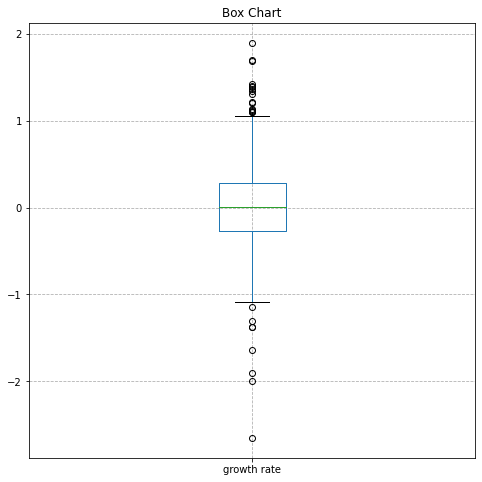

In [211]:
import matplotlib.pyplot as plt

# 利用盒形圖判斷資料分布的樣子，可以各自知道outliner跟四分位數
plt.figure(figsize=(8,8))
eur_df['growth rate'].plot.box(title="Box Chart")
plt.grid(linestyle="--", alpha=1)
plt.show()

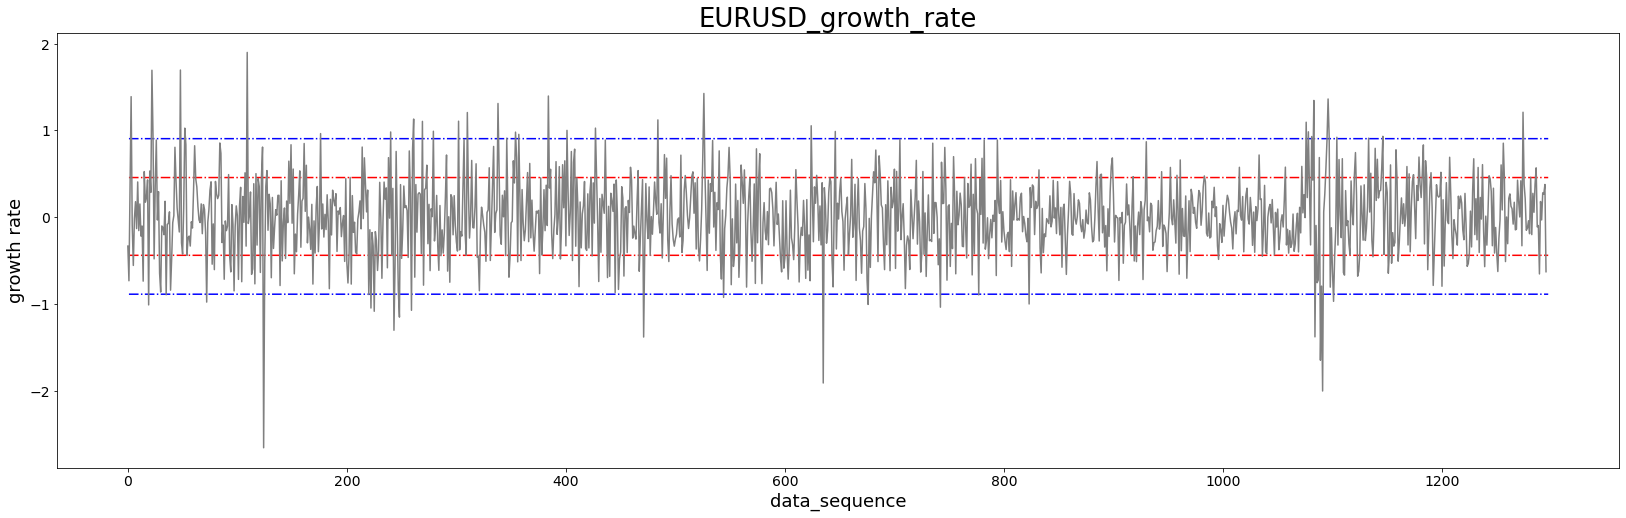

In [212]:
#建立一標準差的上下線(68%)
z = list()
base_up = list()
base_blow = list()
base_2up = list()
base_2blow = list()

for i in range(1297):
    z.append(i+1)
    base_up.append(eur_growth_rate_mean+eur_growth_rate_std)
    base_blow.append(eur_growth_rate_mean-eur_growth_rate_std)
    base_2up.append(eur_growth_rate_mean+eur_growth_rate_std*2)
    base_2blow.append(eur_growth_rate_mean-eur_growth_rate_std*2)

plt.figure(figsize=(28,8))

#畫第一條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_up, "r-.")  

#畫第二條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_blow, "r-.")  

#畫第三條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_2up, "b-.")  

#畫第四條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_2blow, "b-.")  

plt.plot(eur_df["growth rate"], color='gray')
plt.xlabel('data_sequence', fontsize = 18) # 設定x軸標題
plt.ylabel('growth rate', fontsize = 18)
plt.xticks(fontsize = 14) # 設定x軸label以及垂直顯示
plt.yticks(fontsize = 14) # 設定y軸label以及垂直顯示
plt.title('EURUSD_growth_rate', fontsize = 26) # 設定圖表標題
plt.show() 

### 處理JPY

In [213]:
# 匯入數據資料
jpy_df = pd.read_csv('./FXCM_Data/USDJPY.csv')

In [214]:
# 針對時間做排序(剛好是倒過來的)
jpy_df = jpy_df.iloc[::-1]

# 重新排列index
jpy_df = jpy_df.reset_index(drop=True)

# 選取需要使用的欄位
jpy_df = jpy_df[['Time','USD/JYP(open,bid)','USD/JYP(close,bid)']]

# 裁切時間欄位，以方便後續處理
jpy_df[['month','day','aa']] = jpy_df.Time.str.split('/', expand=True)
jpy_df[['year','time']] = jpy_df.aa.str.split(' ', expand=True)
jpy_df['date'] = jpy_df[['year','month','day']].apply('-'.join, axis=1)
jpy_df = jpy_df[['date', 'USD/JYP(open,bid)','USD/JYP(close,bid)']]

print(jpy_df)

            date  USD/JYP(open,bid)  USD/JYP(close,bid)
0     1993-05-11            110.354             111.754
1     1993-05-12            111.754             111.254
2     1993-05-13            111.254             111.604
3     1993-05-14            111.604             111.804
4     1993-05-18            111.004             111.334
...          ...                ...                 ...
7003  2022-01-05            116.126             116.075
7004  2022-01-06            116.075             115.812
7005  2022-01-07            115.812             115.469
7006  2022-01-10            115.469             115.172
7007  2022-01-11            115.172             115.465

[7008 rows x 3 columns]


In [215]:
# 目前資料比較合理了
# 區出我們需要的時間段來用
print(jpy_df.loc[jpy_df['date'] == '2015-12-31'])
print(jpy_df.loc[jpy_df['date'] == '2020-12-31'])

            date  USD/JYP(open,bid)  USD/JYP(close,bid)
5444  2015-12-31            120.498             120.185
            date  USD/JYP(open,bid)  USD/JYP(close,bid)
6740  2020-12-31            103.157             103.246


In [216]:
jpy_df = jpy_df.loc[5444:6740]
jpy_df = jpy_df.reset_index(drop=True)

growth_value = list()
growth_rate = list()

for i in range(jpy_df.shape[0]-1):
    growth_value.append(jpy_df['USD/JYP(close,bid)'][i+1] - jpy_df['USD/JYP(close,bid)'][i])
    
for i in range(jpy_df.shape[0]-1):
    growth_rate.append(((jpy_df['USD/JYP(close,bid)'][i+1]-jpy_df['USD/JYP(close,bid)'][i]) / jpy_df['USD/JYP(close,bid)'][i])*100)
    
# 取完需要的數據，我們計算當日漲跌，以及漲跌幅度
jpy_df = jpy_df.loc[1:1297]
jpy_df = jpy_df.reset_index(drop=True)
jpy_df['growth value'] = growth_value
jpy_df['growth rate'] = growth_rate

result = list()

for i in range(jpy_df.shape[0]):
    if jpy_df['growth value'][i] < 0:
        result.append(0)
    
    elif jpy_df['growth value'][i] > 0:
        result.append(1)
    
    elif jpy_df['growth value'][i] == 0:
        result.append(2)
        
jpy_df["binary"] = result

#取百分之一的區間
ternary = list()

for i in range(jpy_df.shape[0]):
    if jpy_df['growth rate'][i] < -0.1:
        ternary.append(0)
    
    elif jpy_df['growth rate'][i] > 0.1:
        ternary.append(1)
        
    else :
        ternary.append(2)
        
jpy_df["ternary_1"] = ternary

#取百分之二的區間
ternary = list()

for i in range(jpy_df.shape[0]):
    if jpy_df['growth rate'][i] < -0.2:
        ternary.append(0)
    
    elif jpy_df['growth rate'][i] > 0.2:
        ternary.append(1)
        
    else :
        ternary.append(2)
        
jpy_df["ternary_2"] = ternary

In [217]:
jpy_df

,date,"USD/JYP(open,bid)","USD/JYP(close,bid)",growth value,growth rate,binary,ternary_1,ternary_2
0,2016-01-04,120.174,119.424,-0.761,-0.633190,0,0,0
1,2016-01-05,119.424,119.046,-0.378,-0.316519,0,0,0
2,2016-01-06,119.046,118.456,-0.590,-0.495607,0,0,0
3,2016-01-07,118.456,117.646,-0.810,-0.683798,0,0,0
4,2016-01-08,117.646,117.195,-0.451,-0.383353,0,0,0
...,...,...,...,...,...,...,...,...
1291,2020-12-24,103.509,103.659,0.150,0.144915,1,1,2
1292,2020-12-28,103.517,103.758,0.099,0.095505,1,2,2
1293,2020-12-29,103.758,103.527,-0.231,-0.222633,0,0,0
1294,2020-12-30,103.527,103.157,-0.370,-0.357395,0,0,0


In [218]:
#更換名稱 受不了!!!
jpy_df.rename(columns = {"USD/JYP(open,bid)":"USD/JPY(open,bid)","USD/JYP(close,bid)":"USD/JPY(close,bid)"},inplace=True)

In [219]:
jpy_df

,date,"USD/JPY(open,bid)","USD/JPY(close,bid)",growth value,growth rate,binary,ternary_1,ternary_2
0,2016-01-04,120.174,119.424,-0.761,-0.633190,0,0,0
1,2016-01-05,119.424,119.046,-0.378,-0.316519,0,0,0
2,2016-01-06,119.046,118.456,-0.590,-0.495607,0,0,0
3,2016-01-07,118.456,117.646,-0.810,-0.683798,0,0,0
4,2016-01-08,117.646,117.195,-0.451,-0.383353,0,0,0
...,...,...,...,...,...,...,...,...
1291,2020-12-24,103.509,103.659,0.150,0.144915,1,1,2
1292,2020-12-28,103.517,103.758,0.099,0.095505,1,2,2
1293,2020-12-29,103.758,103.527,-0.231,-0.222633,0,0,0
1294,2020-12-30,103.527,103.157,-0.370,-0.357395,0,0,0


In [220]:
up = 0
down = 0
b = 0

for i in jpy_df["binary"]:
    if i == 0:
        down += 1
    elif i == 1:
        up += 1
    elif i == 2:
        b += 1

print("上漲: ",up)
print("下跌: ",down)
print("平盤: ",b) 

上漲:  636
下跌:  660
平盤:  0


In [221]:
up = 0
down = 0
b = 0

for i in jpy_df["ternary_1"]:
    if i == 0:
        down += 1
    elif i == 1:
        up += 1
    elif i == 2:
        b += 1

print("上漲: ",up)
print("下跌: ",down)
print("平盤: ",b) 

上漲:  501
下跌:  519
平盤:  276


In [222]:
up = 0
down = 0
b = 0

for i in jpy_df["ternary_2"]:
    if i == 0:
        down += 1
    elif i == 1:
        up += 1
    elif i == 2:
        b += 1

print("上漲: ",up)
print("下跌: ",down)
print("平盤: ",b) 

上漲:  390
下跌:  397
平盤:  509


In [229]:
jpy_df.to_csv("./Pre_data/forex/USDJPY_rate_105_109.csv")

In [226]:
print(jpy_df.describe())
jpy_growth_rate_mean = jpy_df["growth rate"].mean()
jpy_growth_rate_std = jpy_df["growth rate"].std()

       USD/JPY(open,bid)  USD/JPY(close,bid)  growth value  growth rate  \
count        1296.000000         1296.000000   1296.000000  1296.000000   
mean          109.404219          109.393585     -0.013070    -0.010226   
std             3.571296            3.564021      0.595726     0.546871   
min            99.870000           99.870000     -3.926000    -3.699620   
25%           107.043750          107.041250     -0.295250    -0.266859   
50%           109.539500          109.534000     -0.011000    -0.010167   
75%           111.916750          111.916000      0.294000     0.268284   
max           121.318000          121.113000      3.329000     3.200750   

            binary    ternary_1    ternary_2  
count  1296.000000  1296.000000  1296.000000  
mean      0.490741     0.812500     1.086420  
std       0.500107     0.760734     0.831949  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     1.000000     1.0000

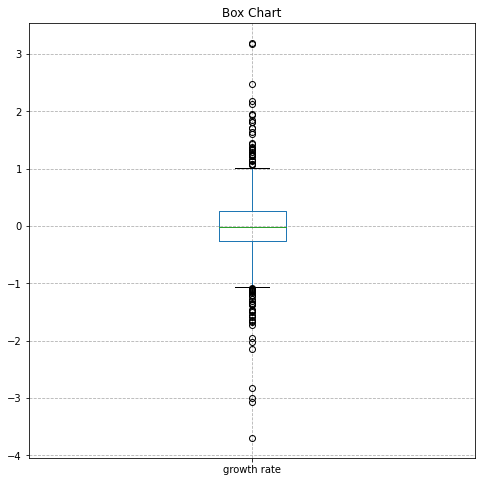

In [227]:
import matplotlib.pyplot as plt

# 利用盒形圖判斷資料分布的樣子，可以各自知道outliner跟四分位數
plt.figure(figsize=(8,8))
jpy_df['growth rate'].plot.box(title="Box Chart")
plt.grid(linestyle="--", alpha=1)
plt.show()

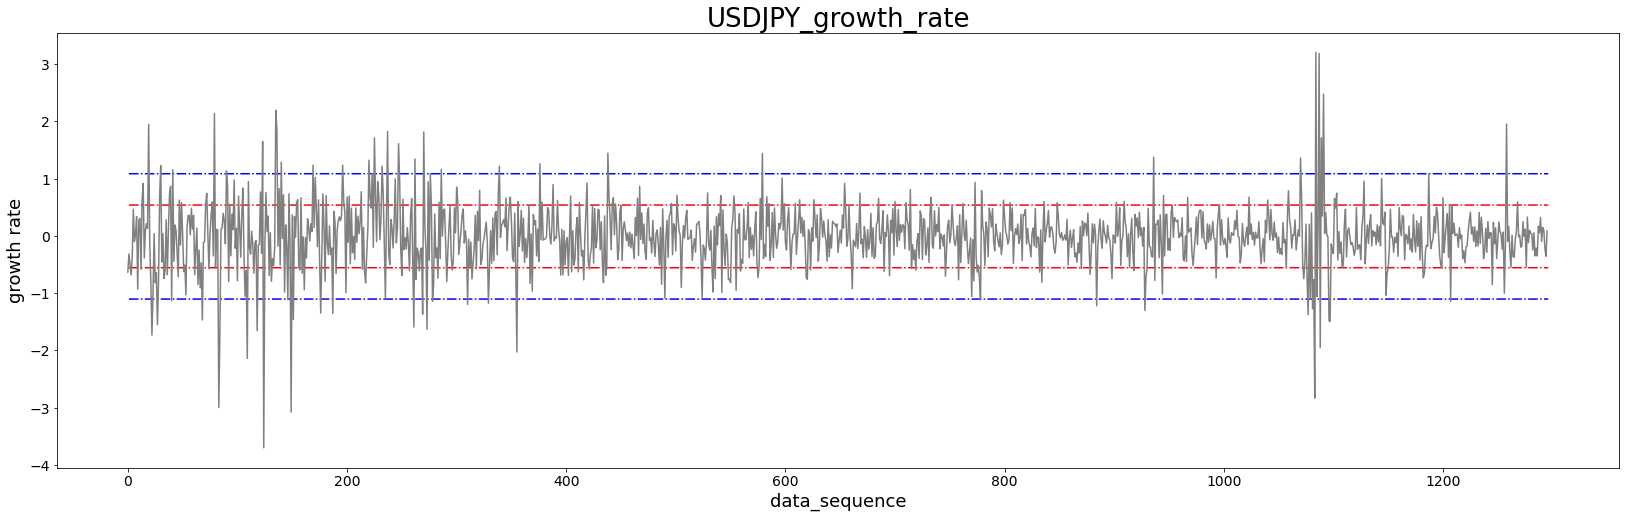

In [228]:
#建立一標準差的上下線(68%)
z = list()
base_up = list()
base_blow = list()
base_2up = list()
base_2blow = list()

for i in range(1296):
    z.append(i+1)
    base_up.append(jpy_growth_rate_mean+jpy_growth_rate_std)
    base_blow.append(jpy_growth_rate_mean-jpy_growth_rate_std)
    base_2up.append(jpy_growth_rate_mean+jpy_growth_rate_std*2)
    base_2blow.append(jpy_growth_rate_mean-jpy_growth_rate_std*2)

plt.figure(figsize=(28,8))

#畫第一條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_up, "r-.")  

#畫第二條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_blow, "r-.")  

#畫第三條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_2up, "b-.")  

#畫第四條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(z, base_2blow, "b-.")  

plt.plot(jpy_df["growth rate"], color='gray')
plt.xlabel('data_sequence', fontsize = 18) # 設定x軸標題
plt.ylabel('growth rate', fontsize = 18)
plt.xticks(fontsize = 14) # 設定x軸label以及垂直顯示
plt.yticks(fontsize = 14) # 設定y軸label以及垂直顯示
plt.title('USDJPY_growth_rate', fontsize = 26) # 設定圖表標題
plt.show() 